In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras_preprocessing import image
from keras_preprocessing.image import img_to_array



img_dir = 'helmet_generation'  # 이미지가 들어있는 폴더 경로
img_width = 64  # 이미지 가로 길이
img_height = 64  # 이미지 세로 길이

# 이미지를 numpy array로 변환
def img_to_np_array(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    x = img_to_array(img)
    return x

# 이미지 경로와 라벨을 읽어들임
image_paths = []
labels = []
for subdir, _, files in os.walk(img_dir):
    for file in files:
        img_path = os.path.join(subdir, file)
        if img_path.endswith(".png"):
            label = img_path.split("/")[-1]  # 폴더 이름을 라벨로 사용
            image_paths.append(img_path)
            labels.append(label)

# 이미지를 numpy array로 변환
X = np.array([img_to_np_array(img_path) for img_path in image_paths])
y = np.array(labels)

# train/test set으로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
y_train

array(['helmet_generation\\Without_Helmet\\withoutnoiseAdded_7776.png',
       'helmet_generation\\Without_Helmet\\withoutnoiseAdded_1785.png',
       'helmet_generation\\Without_Helmet\\withoutrotated_7174.png', ...,
       'helmet_generation\\Without_Helmet\\withoutnoiseAdded_6442.png',
       'helmet_generation\\Without_Helmet\\withoutinverted_3287.png',
       'helmet_generation\\With_Helmet\\withnoiseAdded_7811.png'],
      dtype='<U59')

In [4]:
# Without_Helmet에 해당하는 파일은 0, With_Helmet에 해당하는 파일은 1로 바꿔줌
y_train = np.array([0 if 'Without_Helmet' in label else 1 for label in y_train])
y_test = np.array([0 if 'Without_Helmet' in label else 1 for label in y_test])

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(64, 64, 3), activation='relu' ))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.25, batch_size=32, epochs=10)

Epoch 1/10
375/375 [==============================] - 7s 10ms/step - loss: 17.3728 - accuracy: 0.7903 - val_loss: 0.3063 - val_accuracy: 0.8737
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1994 - accuracy: 0.9227 - val_loss: 0.2317 - val_accuracy: 0.9172
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0982 - accuracy: 0.9643 - val_loss: 0.2131 - val_accuracy: 0.9333
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0452 - accuracy: 0.9845 - val_loss: 0.1977 - val_accuracy: 0.9415
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0284 - accuracy: 0.9908 - val_loss: 0.2761 - val_accuracy: 0.9415
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0452 - accuracy: 0.9857 - val_loss: 0.2602 - val_accuracy: 0.9430
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0201 - accuracy: 0.9936 - val_loss: 0.2764 - val_accuracy: 0.953

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 128)       36992     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 128)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 115200)            0         
                                                                 
 dense (Dense)               (None, 128)               14745728  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                        

In [7]:
history = model.fit(X_train, y_train, validation_split=0.25, batch_size=32, epochs=10)

#테스트 정확도 출력
print('\n test acc: %.4f' %(model.evaluate(X_test, y_test)[1])) 

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0043 - accuracy: 0.9990 - val_loss: 0.2755 - val_accuracy: 0.9575
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0397 - accuracy: 0.9906 - val_loss: 0.3665 - val_accuracy: 0.9358
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.2534 - val_accuracy: 0.9532
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0172 - accuracy: 0.9952 - val_loss: 0.3147 - val_accuracy: 0.9467
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0188 - accuracy: 0.9942 - val_loss: 0.3813 - val_accuracy: 0.9460
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0570 - accuracy: 0.9861 - val_loss: 0.2868 - val_accuracy: 0.9465
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0177 - accuracy: 0.9942 - val_loss: 0.3395 - val_accuracy: 0.9448

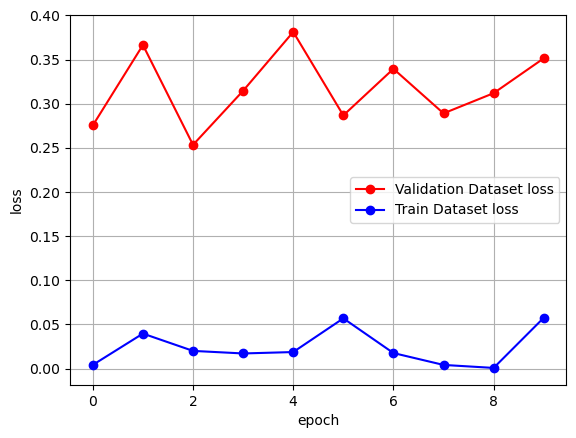

In [8]:
#학습용 데이터 셋/검증 셋 오차 저장

y_vloss=history.history['val_loss']
y_loss=history.history['loss']

#그래프로 표현
x_len=np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='o', c='red', label='Validation Dataset loss')
plt.plot(x_len, y_loss, marker='o', c='blue', label='Train Dataset loss')

plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [9]:
# 모델 평가
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# 모델 예측
y_pred = model.predict(X_test)

Test loss: 0.3534330129623413
Test accuracy: 0.9365000128746033
125/125 [==============================] - 0s 2ms/step


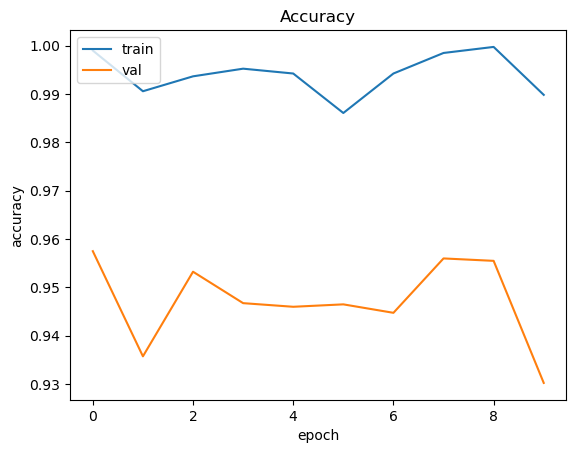

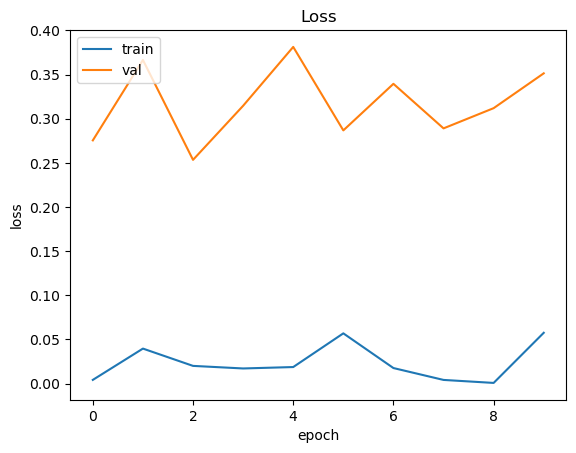

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [10]:
import matplotlib.pyplot as plt

# 정확도 그래프 출력
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 손실 그래프 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 모델 시각화
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# 모델 저장
model.save('my_model.h5')

In [14]:
from PIL import Image

In [15]:
yb_img = ['yb.png']
yb_img_1 = []
for i in range(len(yb_img)):
    img = Image.open(yb_img[i])
    yb_img_1.append(img.resize((128,128)))

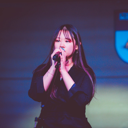

In [16]:
yb_img_1[0]

In [17]:
img = np.array(yb_img_1[0])/255

In [18]:
img = img.reshape(1, 64, 64, -1)
img.shape

(1, 64, 64, 12)

In [20]:
model.predict(img)

1/1 [==============================] - 0s 67ms/step


array([[0.51938105]], dtype=float32)